In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
import pdvega
import seaborn as sns
# for configuring connection 
from configobj import ConfigObj
import os

%matplotlib inline

In [2]:
# Create a database connection using settings from config file
config='../db/config.ini'

# connection info
conn_info = dict()
if os.path.isfile(config):
    config = ConfigObj(config)
    conn_info["sqluser"] = config['username']
    conn_info["sqlpass"] = config['password']
    conn_info["sqlhost"] = config['host']
    conn_info["sqlport"] = config['port']
    conn_info["dbname"] = config['dbname']
    conn_info["schema_name"] = config['schema_name']
else:
    conn_info["sqluser"] = 'postgres'
    conn_info["sqlpass"] = ''
    conn_info["sqlhost"] = '192.168.60.144'
    conn_info["sqlport"] = 6432
    conn_info["dbname"] = 'eicu'
    conn_info["schema_name"] = 'public,eicu_crd'
    
# Connect to the eICU database
print('Database: {}'.format(conn_info['dbname']))
print('Username: {}'.format(conn_info["sqluser"]))
if conn_info["sqlpass"] == '':
    # try connecting without password, i.e. peer or OS authentication
    try:
        if (conn_info["sqlhost"] == '192.168.60.144') & (conn_info["sqlport"]=='6432'):
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   user=conn_info["sqluser"])            
        else:
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   host=conn_info["sqlhost"],
                                   port=conn_info["sqlport"],
                                   user=conn_info["sqluser"])
    except:
        conn_info["sqlpass"] = getpass.getpass('Password: ')

        con = psycopg2.connect(dbname=conn_info["dbname"],
                               host=conn_info["sqlhost"],
                               port=conn_info["sqlport"],
                               user=conn_info["sqluser"],
                               password=conn_info["sqlpass"])
query_schema = 'set search_path to ' + conn_info['schema_name'] + ';'

Database: eicu
Username: postgres


In [3]:
from sqlalchemy import create_engine,text
con= create_engine('postgresql://eicu@192.168.60.144:6432/eicu')

In [2]:
datadir = '/home/mei/nas/docker/dataset/EICU/eicu-collaborative-research-database-2.0/'
porcesseddir2 = '/home/mei/nas/docker/processedData_2/'

In [5]:
def round_up(x, base=5):
    return base * round(x/base)

In [6]:
query = query_schema + """
select p.patientunitstayid, p.hospitaladmitOffset,l.labresultoffset,p.gender, p.age, 
      p.apacheadmissiondx,l.labname,l.labresult,p.unitadmitsource, p.admissionweight,	
      p.dischargeweight, p.unitdischargeoffset, p.unitdischargelocation,	
      p.unitdischargestatus
from lab l
join patient_2 p
  on l.patientunitstayid = p.patientunitstayid
  
order by p.patientunitstayid, p.hospitaladmitOffset,l.labresultoffset
"""

In [7]:
df_lab= pd.read_sql_query(query,con)
df_lab.head(n=20)

,patientunitstayid,hospitaladmitoffset,labresultoffset,gender,age,apacheadmissiondx,labname,labresult,unitadmitsource,admissionweight,dischargeweight,unitdischargeoffset,unitdischargelocation,unitdischargestatus
0,141168,0,231,Female,70,"Rhythm disturbance (atrial, supraventricular)",PT - INR,1.70,Direct Admit,84.3,85.8,3596,Death,Expired
1,141168,0,231,Female,70,"Rhythm disturbance (atrial, supraventricular)",PT,17.10,Direct Admit,84.3,85.8,3596,Death,Expired
2,141168,0,231,Female,70,"Rhythm disturbance (atrial, supraventricular)",PTT,29.00,Direct Admit,84.3,85.8,3596,Death,Expired
3,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",WBC x 1000,9.80,Direct Admit,84.3,85.8,3596,Death,Expired
4,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",albumin,3.10,Direct Admit,84.3,85.8,3596,Death,Expired
5,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",bicarbonate,26.00,Direct Admit,84.3,85.8,3596,Death,Expired
6,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",-eos,1.00,Direct Admit,84.3,85.8,3596,Death,Expired
7,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",total protein,7.10,Direct Admit,84.3,85.8,3596,Death,Expired
8,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",BUN,26.00,Direct Admit,84.3,85.8,3596,Death,Expired
9,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",PT - INR,1.90,Direct Admit,84.3,85.8,3596,Death,Expired


In [8]:
lab=df_lab.copy()
lab.set_index(['patientunitstayid', 'hospitaladmitoffset','labresultoffset'], inplace = True)
lab.drop(lab.index[np.where(lab.index.get_level_values('labresultoffset') < 0)], inplace= True)
# Pivot table
lab = pd.pivot_table(lab ,values = 'labresult', index=['patientunitstayid', 'hospitaladmitoffset','labresultoffset'], columns='labname')
lab.columns.name = None
# Resample every 5 mins
lab.rename(round_up, level = 'labresultoffset', inplace = True)
lab = lab.groupby(['patientunitstayid', 'hospitaladmitoffset','labresultoffset']).mean()
lab.head()


-bands  -basos  -eos  \
patientunitstayid hospitaladmitoffset labresultoffset                         
141168            0                   230                 NaN     NaN   NaN   
                                      515                 NaN     0.0   1.0   
                                      1135                NaN     0.0   0.0   
                                      1700                NaN     NaN   NaN   
                                      1805                NaN     NaN   NaN   

                                                       -lymphs  -monos  \
patientunitstayid hospitaladmitoffset labresultoffset                    
141168            0                   230                  NaN     NaN   
                                      515                 19.0    19.0   
                                      1135                 6.0    14.0   
                                      1700                 NaN     NaN   
                                      1805                 NaN     NaN   

                                                       -polys  \
patientunitstayid hospitaladmitoffset labresultoffset           
141168            0                   230                 NaN   
                                      515                61.0   
                                      1135               80.0   
                                      1700                NaN   
                                      1805                NaN   

                                                       24 h urine protein  \
patientunitstayid hospitaladmitoffset labresultoffset                       
141168            0                   230                             NaN   
                                      515                             NaN   
                                      1135                            NaN   
                                      1700                            NaN   
                                      1805                            NaN   

                                                       24 h urine urea nitrogen  \
patientunitstayid hospitaladmitoffset labresultoffset                             
141168            0                   230                                   NaN   
                                      515                                   NaN   
                                      1135                                  NaN   
                                      1700                                  NaN   
                                      1805                                  NaN   

                                                       ALT (SGPT)  ANF/ANA  \
patientunitstayid hospitaladmitoffset labresultoffset                        
141168            0                   230                     NaN      NaN   
                                      515                    40.0      NaN   
                                      1135                  358.0      NaN   
                                      1700                    NaN      NaN   
                                      1805                    NaN      NaN   

                                                       ...  total protein  \
patientunitstayid hospitaladmitoffset labresultoffset  ...                  
141168            0                   230              ...            NaN   
                                      515              ...            7.1   
                                      1135             ...            7.1   
                                      1700             ...            NaN   
                                      1805             ...            NaN   

                                                       transferrin  \
patientunitstayid hospitaladmitoffset labresultoffset                
141168            0                   230                      NaN   
                                      515                      NaN   
                                     

In [18]:
# lab.to_csv(porcesseddir2 + 'selected_lab.csv',  index=True)

lab= pd.read_csv(porcesseddir2 + 'selected_lab.csv')
lab.drop(columns = 'hospitaladmitoffset', inplace= True)
lab.set_index(['patientunitstayid', 'labresultoffset'], inplace = True)
lab.sort_index(level = ['patientunitstayid', 'labresultoffset'], inplace = True)

In [4]:
n=len(list(lab.index.get_level_values('patientunitstayid').unique()))
r=len(lab)
print("There are {} unique patientunitstayid in the selected patients with the total {} records.".format(n,r))

There are 67928 unique patientunitstayid in the selected patients with the total 1775099 records.


## 将时间轴（labresultoffset）集合起来，按照病人是否有过一次lab 进行记录

In [19]:
lab_binary = lab.copy() 
# lab_binary = lab_binary.fillna(0)   # 非 NaN 为 1，NaN 为 0

In [20]:
lab_binary.head(n=10)

-bands  -basos  -eos  -lymphs  -monos  \
patientunitstayid labresultoffset                                          
141168            230                 NaN     NaN   NaN      NaN     NaN   
                  515                 NaN     0.0   1.0     19.0    19.0   
                  1135                NaN     0.0   0.0      6.0    14.0   
                  1700                NaN     NaN   NaN      NaN     NaN   
                  1805                NaN     NaN   NaN      NaN     NaN   
                  2010                NaN     NaN   NaN      NaN     NaN   
                  2025                NaN     0.0   0.0     10.0    12.0   
                  2140                NaN     NaN   NaN      NaN     NaN   
141265            530                 NaN     NaN   NaN      NaN     NaN   
                  535                 NaN     NaN   NaN      NaN     NaN   

                                   -polys  24 h urine protein  \
patientunitstayid labresultoffset                               
141168            230                 NaN                 NaN   
                  515                61.0                 NaN   
                  1135               80.0                 NaN   
                  1700                NaN                 NaN   
                  1805                NaN                 NaN   
                  2010                NaN                 NaN   
                  2025               78.0                 NaN   
                  2140                NaN                 NaN   
141265            530                 NaN                 NaN   
                  535                 NaN                 NaN   

                                   24 h urine urea nitrogen  ALT (SGPT)  \
patientunitstayid labresultoffset                                         
141168            230                                   NaN         NaN   
                  515                                   NaN        40.0   
                  1135                                  NaN       358.0   
                  1700                                  NaN         NaN   
                  1805                                  NaN         NaN   
                  2010                                  NaN         NaN   
                  2025                                  NaN      1189.0   
                  2140                                  NaN         NaN   
141265            530                                   NaN         NaN   
                  535                                   NaN         NaN   

                                   ANF/ANA  ...  total protein  transferrin  \
patientunitstayid labresultoffset           ...                               
141168            230                  NaN  ...            NaN          NaN   
                  515                  NaN  ...            7.1          NaN   
                  1135                 NaN  ...            7.1          NaN   
                  1700                 NaN  ...            NaN          NaN   
                  1805                 NaN  ...            NaN          NaN   
                  2010                 NaN  ...            NaN          NaN   
                  2025                 NaN  ...            6.3          NaN   
                  2140                 NaN  ...            NaN          NaN   
141265            530                  NaN  ...            NaN          NaN   
                  535                  NaN  ...            NaN          NaN   

                                   triglycerides  troponin - I  troponin - T  \
patientunitstayid labresultoffset                                              
141168            230                        NaN           NaN           NaN   
                  515                        NaN           NaN           NaN   
                  1135                       NaN           NaN           NaN   
                  1700                       NaN           NaN           NaN   
           

In [21]:
lab_summary = lab_binary.groupby('patientunitstayid').sum()
lab_summary['has_lab'] = (lab_summary.sum(axis=1) > 0).astype(int)

In [22]:
lab_summary.head()

,-bands,-basos,-eos,-lymphs,-monos,-polys,24 h urine protein,24 h urine urea nitrogen,ALT (SGPT),ANF/ANA,...,transferrin,triglycerides,troponin - I,troponin - T,uric acid,urinary creatinine,urinary osmolality,urinary sodium,urinary specific gravity,has_lab
patientunitstayid,,,,,,,,,,,,,,,,,,,,,
141168,0.0,0.0,1.0,35.0,45.0,219.0,0.0,0.0,1587.0,0.0,...,0.0,0.0,0.25,0.0,8.1,173.12,0.0,12.0,0.0,1
141265,0.0,0.0,7.0,76.0,49.0,363.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1
141266,0.0,0.0,15.0,83.0,81.0,621.0,0.0,0.0,152.0,0.0,...,0.0,0.0,28.11,0.0,0.0,0.00,0.0,0.0,0.0,1
141276,0.0,0.0,0.0,20.0,6.0,74.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1
141284,0.0,2.0,14.0,35.0,11.0,138.0,0.0,0.0,85.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1


In [25]:
lab_done=lab.copy()
lab_done = lab.dropna(how='all', subset=lab.columns[2:]) 
# 如果一个病人在某个时间点没有任何实验室数据记录，该行将被删除。

In [28]:
lab_done

-bands  -basos  -eos  -lymphs  -monos  \
patientunitstayid labresultoffset                                          
141168            230                 NaN     NaN   NaN      NaN     NaN   
                  515                 NaN     0.0   1.0     19.0    19.0   
                  1135                NaN     0.0   0.0      6.0    14.0   
                  1700                NaN     NaN   NaN      NaN     NaN   
                  1805                NaN     NaN   NaN      NaN     NaN   
...                                   ...     ...   ...      ...     ...   
3353251           17625               NaN     NaN   NaN      NaN     NaN   
                  17855               NaN     NaN   NaN      NaN     NaN   
                  18325               NaN     NaN   NaN      NaN     NaN   
                  18520               NaN     NaN   NaN      NaN     NaN   
                  18800               NaN     NaN   NaN      NaN     NaN   

                                   -polys  24 h urine protein  \
patientunitstayid labresultoffset                               
141168            230                 NaN                 NaN   
                  515                61.0                 NaN   
                  1135               80.0                 NaN   
                  1700                NaN                 NaN   
                  1805                NaN                 NaN   
...                                   ...                 ...   
3353251           17625               NaN                 NaN   
                  17855               NaN                 NaN   
                  18325               NaN                 NaN   
                  18520               NaN                 NaN   
                  18800               NaN                 NaN   

                                   24 h urine urea nitrogen  ALT (SGPT)  \
patientunitstayid labresultoffset                                         
141168            230                                   NaN         NaN   
                  515                                   NaN        40.0   
                  1135                                  NaN       358.0   
                  1700                                  NaN         NaN   
                  1805                                  NaN         NaN   
...                                                     ...         ...   
3353251           17625                                 NaN         NaN   
                  17855                                 NaN         NaN   
                  18325                                 NaN         NaN   
                  18520                                 NaN         NaN   
                  18800                                 NaN         NaN   

                                   ANF/ANA  ...  total protein  transferrin  \
patientunitstayid labresultoffset           ...                               
141168            230                  NaN  ...            NaN          NaN   
                  515                  NaN  ...            7.1          NaN   
                  1135                 NaN  ...            7.1          NaN   
                  1700                 NaN  ...            NaN          NaN   
                  1805                 NaN  ...            NaN          NaN   
...                                    ...  ...            ...          ...   
3353251           17625                NaN  ...            NaN          NaN   
                  17855                NaN  ...            NaN          NaN   
                  18325                NaN  ...            NaN          NaN   
                  18520                NaN  ...            NaN          NaN   
                  18800                NaN  ...            NaN          NaN   

                                   triglycerides  troponin - I  troponin - T  \
patientunitstayid labresultoffset                                              
141168            230               

In [29]:
missing_ratio = pd.DataFrame(lab_done.isna().sum() / len(lab_done.index), columns = ['missing ratio %']) * 100
missing_ratio.sort_values('missing ratio %', inplace = True, ascending = False) 
missing_ratio

,missing ratio %
HSV 1&2 IgG AB,99.999944
HSV 1&2 IgG AB titer,99.999944
Procainamide,99.999887
NAPA,99.999887
Site,99.999831
...,...
chloride,77.648038
glucose,77.290424
sodium,76.219271
potassium,74.943341


In [27]:
lab

-bands  -basos  -eos  -lymphs  -monos  \
patientunitstayid labresultoffset                                          
141168            230                 NaN     NaN   NaN      NaN     NaN   
                  515                 NaN     0.0   1.0     19.0    19.0   
                  1135                NaN     0.0   0.0      6.0    14.0   
                  1700                NaN     NaN   NaN      NaN     NaN   
                  1805                NaN     NaN   NaN      NaN     NaN   
...                                   ...     ...   ...      ...     ...   
3353251           17625               NaN     NaN   NaN      NaN     NaN   
                  17855               NaN     NaN   NaN      NaN     NaN   
                  18325               NaN     NaN   NaN      NaN     NaN   
                  18520               NaN     NaN   NaN      NaN     NaN   
                  18800               NaN     NaN   NaN      NaN     NaN   

                                   -polys  24 h urine protein  \
patientunitstayid labresultoffset                               
141168            230                 NaN                 NaN   
                  515                61.0                 NaN   
                  1135               80.0                 NaN   
                  1700                NaN                 NaN   
                  1805                NaN                 NaN   
...                                   ...                 ...   
3353251           17625               NaN                 NaN   
                  17855               NaN                 NaN   
                  18325               NaN                 NaN   
                  18520               NaN                 NaN   
                  18800               NaN                 NaN   

                                   24 h urine urea nitrogen  ALT (SGPT)  \
patientunitstayid labresultoffset                                         
141168            230                                   NaN         NaN   
                  515                                   NaN        40.0   
                  1135                                  NaN       358.0   
                  1700                                  NaN         NaN   
                  1805                                  NaN         NaN   
...                                                     ...         ...   
3353251           17625                                 NaN         NaN   
                  17855                                 NaN         NaN   
                  18325                                 NaN         NaN   
                  18520                                 NaN         NaN   
                  18800                                 NaN         NaN   

                                   ANF/ANA  ...  total protein  transferrin  \
patientunitstayid labresultoffset           ...                               
141168            230                  NaN  ...            NaN          NaN   
                  515                  NaN  ...            7.1          NaN   
                  1135                 NaN  ...            7.1          NaN   
                  1700                 NaN  ...            NaN          NaN   
                  1805                 NaN  ...            NaN          NaN   
...                                    ...  ...            ...          ...   
3353251           17625                NaN  ...            NaN          NaN   
                  17855                NaN  ...            NaN          NaN   
                  18325                NaN  ...            NaN          NaN   
                  18520                NaN  ...            NaN          NaN   
                  18800                NaN  ...            NaN          NaN   

                                   triglycerides  troponin - I  troponin - T  \
patientunitstayid labresultoffset                                              
141168            230               

In [30]:
missing_ratio = pd.DataFrame(lab.isna().sum() / len(lab.index), columns = ['missing ratio %']) * 100
missing_ratio.sort_values('missing ratio %', inplace = True, ascending = False) 
missing_ratio

,missing ratio %
HSV 1&2 IgG AB,99.999944
HSV 1&2 IgG AB titer,99.999944
Procainamide,99.999887
NAPA,99.999887
Site,99.999831
...,...
chloride,77.648064
glucose,77.290450
sodium,76.219298
potassium,74.943369


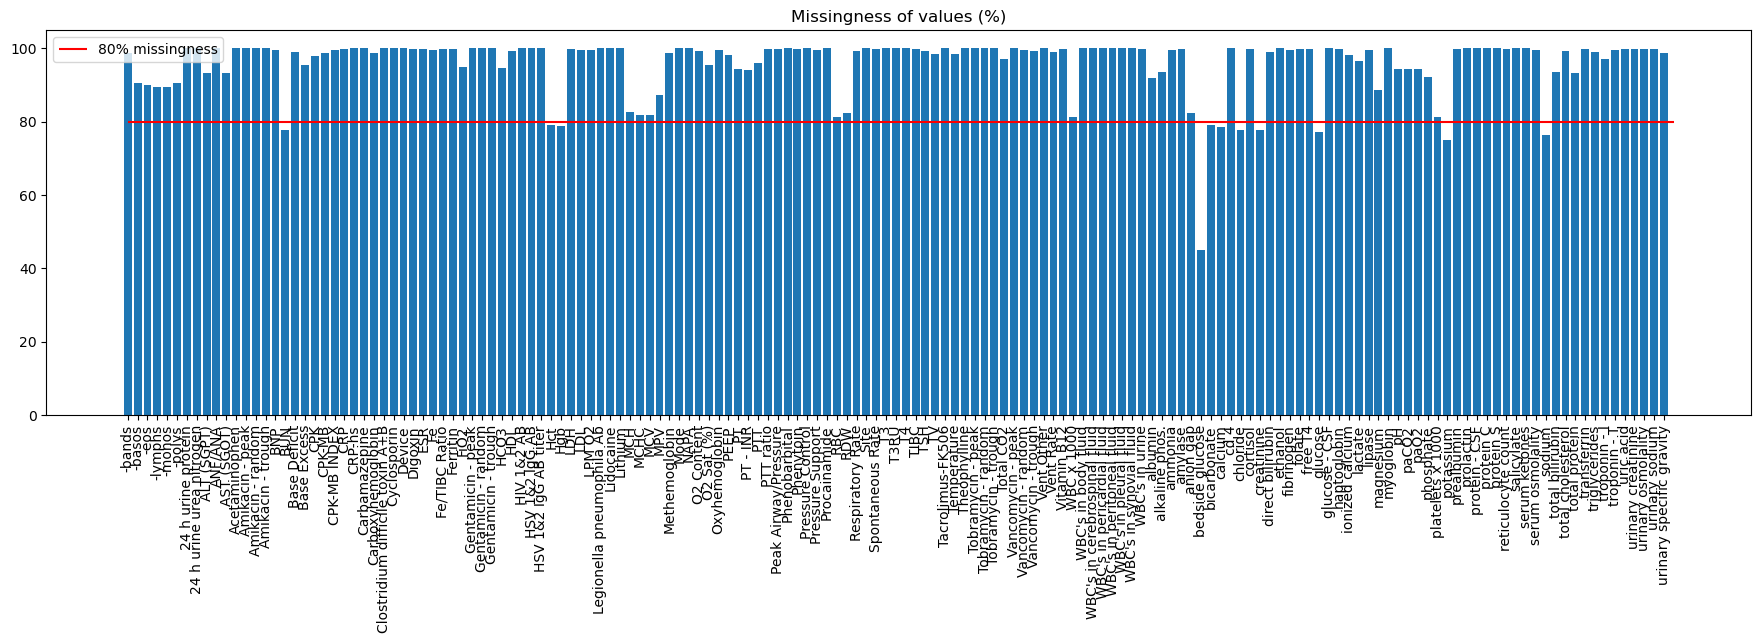

In [32]:
plt.rcParams["figure.figsize"] = (22,5)
missing_ratio = pd.DataFrame(lab_done.isna().sum() / len(lab_done.index), columns = ['missing ratio']) * 100
plt.title('Missingness of values (%)')
plt.bar(missing_ratio.index, missing_ratio['missing ratio'])
plt.xticks(np.arange(0, len(missing_ratio.index)), labels=missing_ratio.index, rotation=90)
plt.hlines(80, 0, len(missing_ratio.index), colors = 'red', label = '80% missingness')
plt.legend()
plt.show()